<a href="https://colab.research.google.com/github/koseogluonur/-Python-for-Data-Science-and-Machine-Learning-/blob/main/Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#İmporting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import files
files.upload()

Saving Telco-Customer-Churn.xlsx to Telco-Customer-Churn.xlsx


{'Telco-Customer-Churn.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [50]:
#Read excel file 
df1=pd.read_excel("Telco-Customer-Churn.xlsx")
df=df1.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [4]:
#Understanding data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [5]:
#Understanding Numeric Data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0


In [ ]:
#We need to convert Churn Column to Numeric
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [10]:
#See Churn and Not Churn Values
dataset=df["Churn"].value_counts()
dataset

No     5174
Yes    1869
Name: Churn, dtype: int64

In [51]:
# Converting categorical data to numeric 
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    df[c] = pd.factorize(df[c])[0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4,1


In [12]:
?plt.subplots

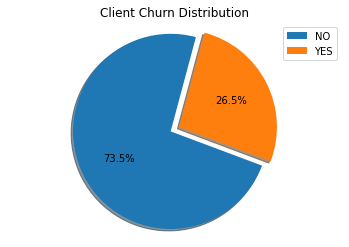

In [13]:
sizes = [5174,1869]
labels='NO','YES'
explode = (0, 0.1)  #Kalınlık,pasta dilimiin büyüklük görünümü
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

In [14]:
df.groupby('gender').Churn.mean()

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

In [20]:
Churn_Mean = [0.269209, 0.261603]
np.arange(len(Churn_Mean))

array([0, 1])

In [21]:
?plt.bar

#EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis The goal of this section is to understand with our data. We will do bivariate analysis. We'll examine how each variable relates to the churn rate.

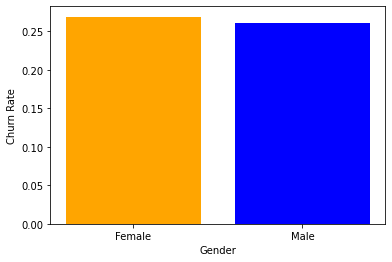

In [22]:
# create a dataset
Churn_Mean = [0.269209, 0.261603]
Gender = ('Female', 'Male')
x_pos = np.arange(len(Churn_Mean))#Numpy dizisi döndürür.Range yapısına benzer.

# Create bars with different colors
plt.bar(x_pos, Churn_Mean, color=['orange','blue'])

# Create names on the x-axis
plt.xticks(x_pos, Gender)

# Add title and axis names
#plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
#plt.legend()

# Show graph
plt.show()

In [23]:
#Original Data
df1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


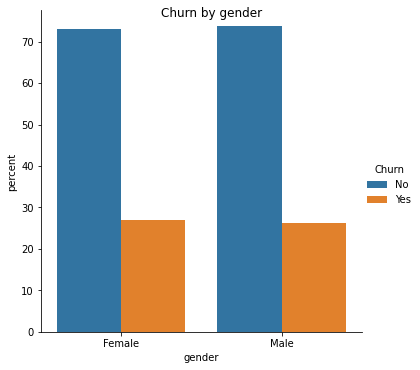

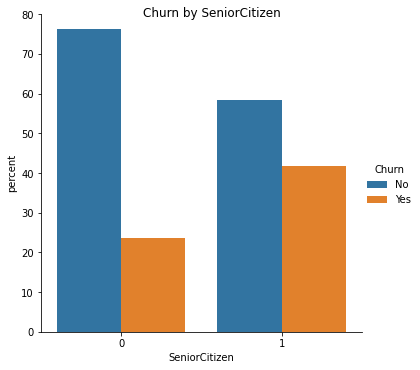

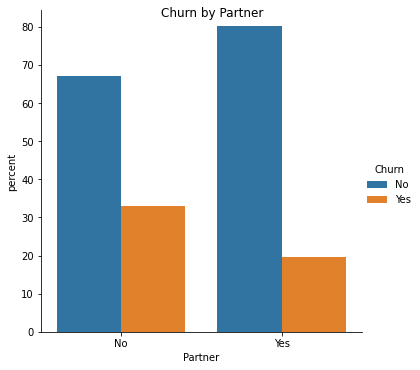

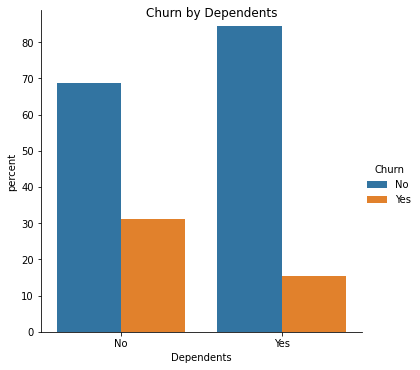

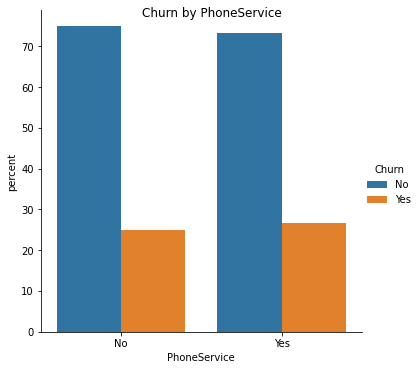

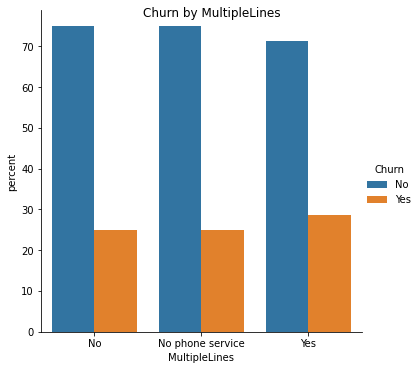

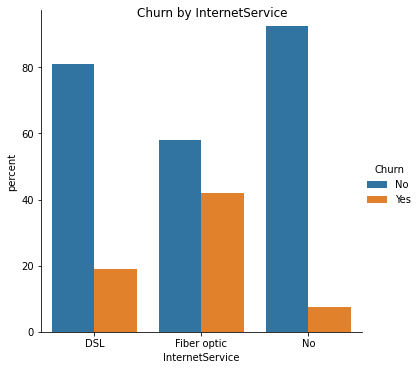

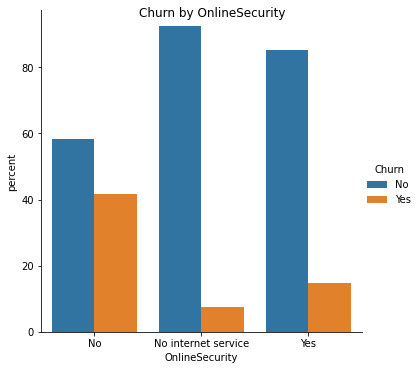

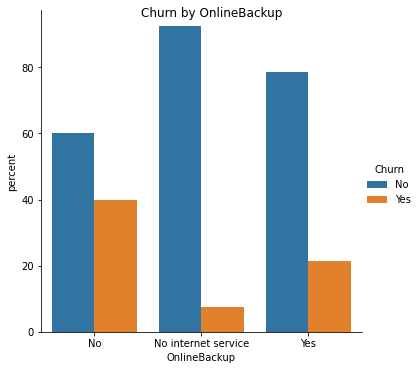

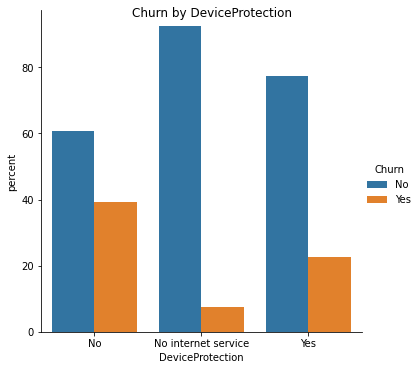

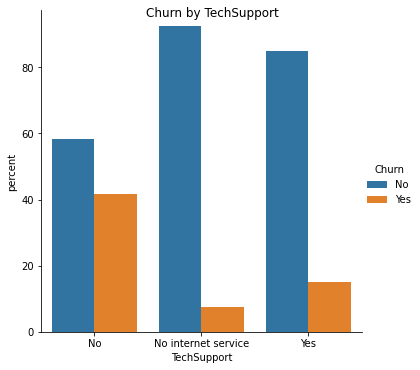

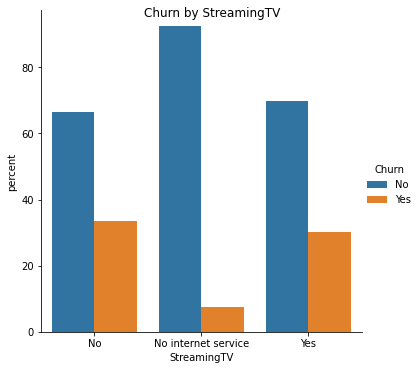

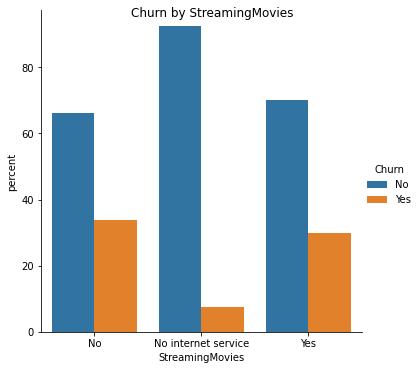

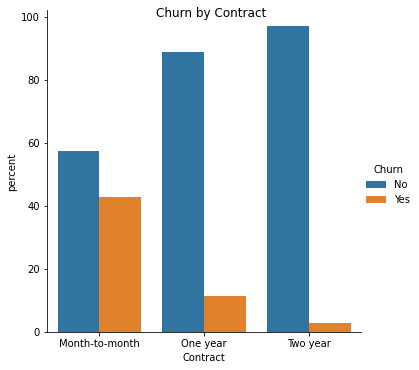

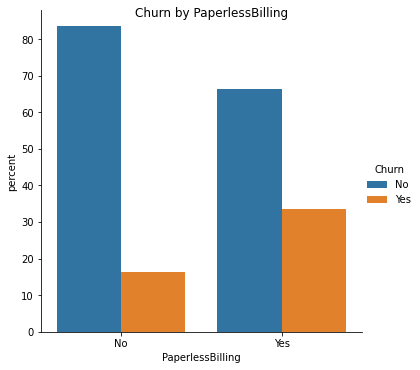

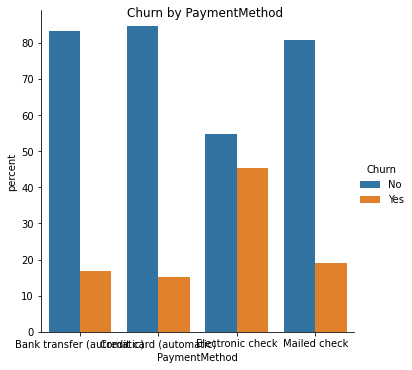

In [24]:
#Toplu istenen grafikleri çıkarma
catvars = df1.columns.tolist()#değerlerin listesini dönderir.Bu değerler str,float,time 
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

y = 'Churn'
for x in catvars:
    plot = df1.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

#TENURE

One peak is customers who have been tenured for a very long time; the other peak is customers who joined very recently. We should assume tenure is in the unit of “months”, because this is how services are billed.You can find code below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


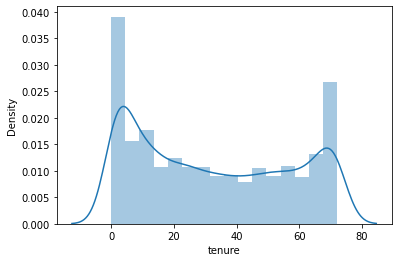

In [25]:
#Tenure
sns.distplot(df1.tenure); 

#CHURN BY TENURE
The first few months of tenure – between months 1-10 – seem to be critical, as this is when most of the churn is happening. There also seems to be a kind of diverging pattern in the middle. Maybe this is some kind of a survivor effect – members who make it past a certain tenure length are more likely to stick it out for the long-term.



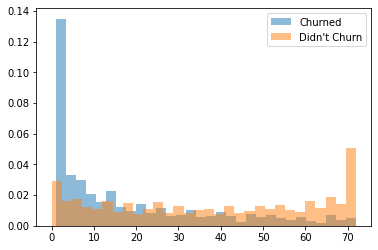

In [26]:
#Churn by tenure 
bins = 30
plt.hist(df1[df1.Churn == 'Yes'].tenure, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df1[df1.Churn == 'No'].tenure, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()

#SUPPORT VECTOR MACHINE CLASSIFIER
Are there any strong correlations? We'll check out.

In [27]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df3 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


In [30]:
#Korelasyon yapısı 
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

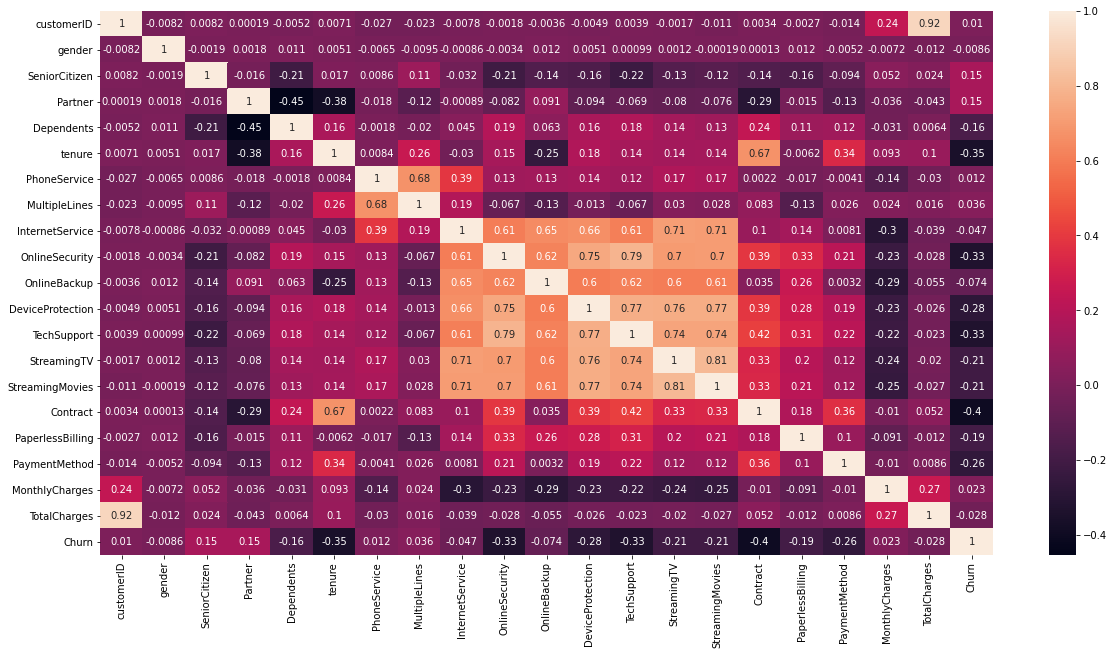

In [37]:
correlation_df = show_correlations(df,show_chart=True);

In [52]:
# Define the target variable (dependent variable) 
y = df.Churn 
X = df.drop(['Churn'], axis= 1)

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4,1


In [85]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)  

In [86]:
# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test) 

In [ ]:
#Model Tuning(Optional if you find the optimized parameter then created model)
svc_params = {"C": np.arange(1,10)}

svclassifier = SVC(kernel='linear', degree=8)

svc_cv_model = GridSearchCV(svclassifier,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

#EVALUATING MODEL PERFORMANCE
Then we apply the Confusion Matrix method to understand how accurate our prediction is. Precision shows how much of what we detect as churn is actually churned. Recall, on the other hand, shows how much of the churn we actually guessed correctly.

The result shows us that the prediction is made at a good level. On average, 78% of the data gives the accuracy share, and 79% shows how accurately we estimate these labels we assign.

In [89]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[938  98]
 [193 180]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#LOGISTIC REGRESSION

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [76]:
#Train-Test seti kurup baştan model kurup valide etmek
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [77]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
loj_model.intercept_

array([0.12341516])

In [71]:
loj_model.coef_

array([[ 1.61194560e-04, -1.92330970e-02,  3.00136760e-01,
        -1.52890288e-03, -1.87379443e-01, -2.64217578e-02,
        -2.01152139e-01,  2.26313766e-01,  5.69950373e-01,
        -7.09539291e-01, -3.16710354e-02, -1.68685653e-01,
        -6.39445543e-01,  2.03546712e-01,  2.32646451e-01,
        -6.88960900e-01, -4.18741432e-01, -1.43873484e-01,
         9.89814641e-05, -1.62345850e-04]])

In [72]:
y_pred = loj_model.predict(X)

In [79]:
# Evaluating model performance
accuracy_score(y_test, loj_model.predict(X_test))

0.8031235210601041

In [80]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7988330501654296